# Group 13 - Yelp Review Analysis for Module 3

Group members:
- Jonquil Liao
- Yuhan Zhou
- Yike Wang

**It can be seen that the tops in bad reviews are likey to be:**

(1) slow service and drink; (2) temperature of steak (seems like thai food in this subset of data); (3) sides and ingredients; (4) place.

## 1. Import the data

In [1]:
import pandas as pd
review = pd.read_json('Data/review_city.json', lines=True)
business = pd.read_json('Data/business_city.json', lines=True)

In [2]:
df_raw = pd.merge(review, business, how='left', on='business_id')
df = df_raw.drop(columns=[ 'review_id', 'funny', 'cool', 'date', 'latitude', 'longitude', 'is_open', 'review_count', 'hours'])

In [3]:
df.head()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
0,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (..."
1,5lb0POg2t-AkMFx6603cYQ,ZlCSsWS07JulSBIQlrbF5w,5,1,Called for a 5:15 morning reservation. The dri...,Black Cab & Limo,,Champaign,IL,,4.5,{'WiFi': 'u'free''},"Airport Shuttles, Transportation, Taxis, Hotel..."
2,6sJN_HlM_uwpfLJ1puf1Fg,oVuZtlCFg_zF090Nhtp0Ow,4,3,A close friend was in town and so instead of t...,Choolaah Indian BBQ,6114 Centre Ave,Pittsburgh,PA,15206,4.0,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Indian, Vegetarian, Vegan, Gluten..."
3,EZ6g9a17UdMjtR-wrZebmA,wSAGILK2CFbq5BVZ5D67-A,3,0,The service is attentive. The decor attractive...,Adega,2017 E 9th St,Cleveland,OH,44115,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mediterranean, Hotels, Beer, Wine & Spirits, B..."
4,hHFSpKcnDtJOs6M-JKFZ8Q,oCvxJBOs-Mbg-4oanPO7lQ,4,0,The ingredients are always fresh and I like th...,Pita Pit,2763 East Carson St,Pittsburgh,PA,15203,3.5,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Fast Food, Greek, Breakfast & Brunch, Restaura..."


In [4]:
df.tail()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
942022,XYCyePb6v-RKdm_THQQQbQ,hWzbOi1-eS8PmPyZRV8Lew,5,0,AMAZING lattes and scones. Nice relaxing atmo...,Staghorn Garden Cafe,517 Greenfield Ave,Pittsburgh,PA,15207,4.5,"{'RestaurantsDelivery': 'False', 'BikeParking'...","Coffee & Tea, Food, Home Decor, Bakeries, Home..."
942023,kqytC4gk1EPGq6LoIYIoiA,NC4_GCUAB9fuvhWgl8bu5Q,5,0,The staff is very friendly and helpful. The fo...,The Blue Goose Saloon,605 Mt Royal Blvd,Pittsburgh,PA,15223,4.0,"{'Ambience': '{'touristy': False, 'hipster': F...","Salad, Restaurants, Nightlife, American (Tradi..."
942024,RfYEn-JHiP7QVovc-3ltgA,0hlQbEOdqNBagHP6xFgRRQ,5,0,"This salon is very clean, professional and upb...",Step Up Styles,3248 Old Frankstown Rd,Plum,PA,15239,5.0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hair Salons, Beauty & Spas"
942025,pjj4Y76C7jHNpH4WOG6slQ,QayOwK3LVRVniGnT6Gzveg,1,0,Went after work to order dinner. I asked the c...,Chipotle Mexican Grill,"5 Atterbury Blvd, Ste 1",Hudson,OH,44236,3.0,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Mexican, Restaurants, Fast Food"
942026,VwVHW0hunS1NXceJJtfVrA,zxg3vChBI__R6q7ACtyokw,1,1,I should have read the pattern of complaints o...,American Asphalt Sealcoating,,Willoughby,OH,44094,2.0,{'BusinessAcceptsCreditCards': 'True'},"Masonry/Concrete, Home Services"


## 2. Choose the Business
**We plan to focus on business type 'Steakhouse', so here we pick out the businesses only in category 'Steakhouse'.**

In [5]:
data = df[df['categories'].str.contains('Steakhouse',na=False)]

In [6]:
data = data[~data['categories'].str.contains('Japanese',na=False)]

**Since Chinese Steakhouse and Japanese Steakhouse are not our target, we would exclude them from the dataset.**

In [7]:
data.head()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
188,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
273,Yvs8q8tth9J5-7Pdxkaq6w,eF2jf-E5ktRQIh_4_-Jxsg,4,1,My rating is purely on the food and not on the...,Cannon's Chop House,1900 Main St,Canonsburg,PA,15317,3.5,"{'Alcohol': 'u'full_bar'', 'RestaurantsReserva...","Steakhouses, Restaurants, Cajun/Creole"
393,kdBn3eSDHkHod1Sl7z_MXw,JhxI7oS_jsFnq34dDubugQ,2,1,Rocky River location. Out of four different en...,Ferris Steak House,8700 Detroit Ave,Cleveland,OH,44102,3.5,"{'RestaurantsReservations': 'True', 'Restauran...","Steakhouses, Restaurants"


In [8]:
len(data)

28409

In [9]:
liststeak = {}.fromkeys(data.business_id).keys()
len(liststeak)

314

**There are around 314 businesses that contains category 'Steakhouse' and 28409 reviews we should work on.**

**Let's take a look at how many reviews in each rating level in histogram.**

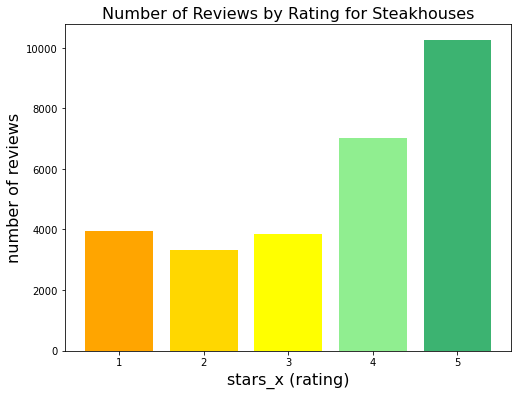

In [10]:
import matplotlib.pyplot as plt
star_x = data.stars_x.value_counts().index
num_star = data.stars_x.value_counts().values
plt.figure(figsize=(8,6))
bar_colors = ['mediumseagreen', 'lightgreen', 'orange', 'yellow', 'gold']
plt.bar(star_x, num_star, color=bar_colors, width=0.8)
plt.xlabel('stars_x (rating)', fontsize=16)
plt.ylabel('number of reviews', fontsize=16)
plt.title('Number of Reviews by Rating for Steakhouses',fontsize=16);

**Let's take a look at how many reviews are there for each rating level.**

In [11]:
review_steakhouse = review[review.business_id.isin(data.business_id)]
review_steakhouse.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
188,wqwgRouFIAi29XGhSiZoDg,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,0,0,Very fresh food and authentic Italian taste. T...,2014-08-10 20:30:28
219,7vsixeZiFsfGoI7JxTpqLg,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,0,1,This is my favorite happy hour place in all of...,2016-11-09 21:15:28
262,0wceCr75fE63DVC-BxJucQ,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,0,0,Ruth Chris Steakhouse is by far one of the bes...,2015-01-03 23:44:23
273,NHDY0NUgqJrZcGBr2UT4fw,Yvs8q8tth9J5-7Pdxkaq6w,eF2jf-E5ktRQIh_4_-Jxsg,4,1,0,0,My rating is purely on the food and not on the...,2018-07-17 00:58:56
393,EEJXr9Huy4_xasYydJTjng,kdBn3eSDHkHod1Sl7z_MXw,JhxI7oS_jsFnq34dDubugQ,2,1,0,0,Rocky River location. Out of four different en...,2013-01-27 21:07:01


**Save the review_steakhouse**

In [12]:
data.to_csv('review_steakhouse.csv')

**Then let's take a look at the length of the reviews.**

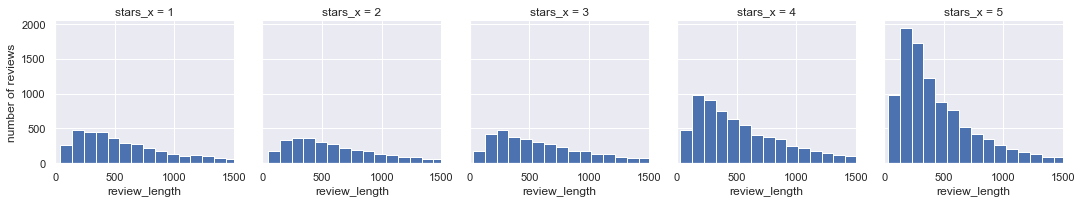

In [13]:
import seaborn as sns
sns.set()
data['review_length'] = data.text.map(len)
multihist = sns.FacetGrid(data=data, col='stars_x',xlim=(0, 1500)).map(plt.hist, 'review_length', bins=50)
multihist.axes[0][0].set(ylabel='number of reviews');

## 3. Choose the topics

In [15]:
import nltk
from nltk.corpus import stopwords
import collections
stop_words = stopwords.words('english')

In [16]:
extra = ['ve', 'like', 'got', 'just', 'us','great','get','even',
               'good','best','nice','always','back','ever',
               'ive','go','well','not','bad','terrible','didnt',
               'don', 'really', 'said', 'told', 'ok','dont',
               'came', 'went', 'did', 'didn','one','would']
stop_words=list(set().union(stop_words,extra))

In [17]:
badreviews = data[(data.stars_x <= 3 )]
goodreviews = data[(data.stars_x >= 4)]
badreviews = badreviews.text
goodreviews = goodreviews.text
print('Postive Reviews:  {:,}'.format(len(goodreviews)))
print('Negative Reviews:  {:,}'.format(len(badreviews)))

Postive Reviews:  17,270
Negative Reviews:  11,139


**clean the review text**

In [18]:
import re, string
badreviews = ["".join([char for char in a if char not in string.punctuation]) for a in badreviews]
goodreviews = ["".join([char for char in a if char not in string.punctuation]) for a in goodreviews]

In [19]:
from nltk import word_tokenize,sent_tokenize

In [20]:
text1=badreviews
text1 = [a.lower() for a in text1]
words1 = [nltk.word_tokenize(a) for a in text1]
filtered_words1 = [[word for word in a if word not in stop_words] for a in words1]
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [21]:
text2=goodreviews
text2 = [a.lower() for a in text2]
words2 = [nltk.word_tokenize(a) for a in text2]
filtered_words2 = [[word for word in a if word not in stop_words] for a in words2]

In [22]:
lemmatized_words1 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words1]
lemmatized_words2 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words2]

**Let's use LSA to determine the number of top topics and topics we plan to do further analysis with.**

**Firstly, we have to use tfdif algorithm to get the top valuous words in bad/good reviews.**

In [23]:
type(lemmatized_words1)

list

In [24]:
badreviews[0]

'Rocky River location Out of four different entrees ordered at our table only 1 grilled salmon was ok A prime rib filet and the beef tips were poor margarine not butter  Dressing tasted bottled For the price I expected a better dinner  Longhorn or Outback blow this place away at a cheaper price  For the same money you can go to Chez Francois in Vermilion and actually get what you are paying for  Will not be back'

In [25]:
lemmatized_words1[0]

['rocky',
 'river',
 'location',
 'four',
 'different',
 'entree',
 'ordered',
 'table',
 '1',
 'grilled',
 'salmon',
 'prime',
 'rib',
 'filet',
 'beef',
 'tip',
 'poor',
 'margarine',
 'butter',
 'dressing',
 'tasted',
 'bottled',
 'price',
 'expected',
 'better',
 'dinner',
 'longhorn',
 'outback',
 'blow',
 'place',
 'away',
 'cheaper',
 'price',
 'money',
 'chez',
 'francois',
 'vermilion',
 'actually',
 'paying']

In [26]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_words1=[ ' '.join(map(str, sent)) for sent in lemmatized_words1]
lemmatized_words2=[ ' '.join(map(str, sent)) for sent in lemmatized_words2]

In [27]:
from array import array

In [28]:
tfidf_model1 = TfidfVectorizer(stop_words=stop_words,
                        ngram_range=(1,1))
tfidf_model2 = TfidfVectorizer(stop_words=stop_words, 
                        ngram_range=(1,1))
result1=tfidf_model1.fit_transform(lemmatized_words1)
result2=tfidf_model2.fit_transform(lemmatized_words2)

In [29]:
print(result1)

  (0, 16712)	0.14754090118182936
  (0, 1521)	0.12446827584391451
  (0, 24517)	0.295842732997814
  (0, 9758)	0.2794512787414887
  (0, 5019)	0.2794512787414887
  (0, 14853)	0.11757567015413165
  (0, 4910)	0.19008539289584434
  (0, 2748)	0.11401752781279588
  (0, 17110)	0.06596486683785775
  (0, 3606)	0.21040518926541577
  (0, 16166)	0.14560175787657195
  (0, 13611)	0.16804226431713346
  (0, 7213)	0.08651362311251379
  (0, 3335)	0.08784447449021181
  (0, 8725)	0.13463565192073063
  (0, 17687)	0.1838853831273944
  (0, 3778)	0.21610665127788506
  (0, 22636)	0.11663842552588788
  (0, 7756)	0.1401500104303607
  (0, 4286)	0.13428572304586092
  (0, 14027)	0.27360091548817783
  (0, 17351)	0.12815813854498348
  (0, 23210)	0.13932507657149523
  (0, 3171)	0.14491587796605468
  (0, 9169)	0.1214845929221131
  :	:
  (11138, 16063)	0.06633089567076488
  (11138, 23276)	0.11922470741574094
  (11138, 20751)	0.10222057669643693
  (11138, 5981)	0.0757434467540953
  (11138, 13536)	0.10251947720310445
  (1113

In [30]:
bad_df = pd.DataFrame(result1.todense(), columns=[tfidf_model1.get_feature_names()])
good_df = pd.DataFrame(result2.todense(), columns=[tfidf_model2.get_feature_names()])

col_means_bad = {}
for col in bad_df:
    col_means_bad[col] = bad_df[col].mean()
col_means_good = {}
for col in good_df:
    col_means_good[col] = good_df[col].mean()
    
top_words = 10

print('Top words in good reviews:')
print(sorted(col_means_good, key=col_means_good.get, reverse=True)[:top_words])
print('Top words in bad reviews:')
print(sorted(col_means_bad, key=col_means_bad.get, reverse=True)[:top_words])

Top words in good reviews:
[('food',), ('service',), ('place',), ('steak',), ('time',), ('restaurant',), ('delicious',), ('bar',), ('amazing',), ('dinner',)]
Top words in bad reviews:
[('food',), ('steak',), ('service',), ('place',), ('time',), ('table',), ('restaurant',), ('ordered',), ('drink',), ('salad',)]


**It looks like the most valuable words in both bad and good reviews are 'food', 'place','service','time'. So clearly, what customers care most is the dishes (of course steaks for steakhouses), atmosphere, food delivery time and customer services. Now it has given us some intuition, let's do further analysis using LSA.**

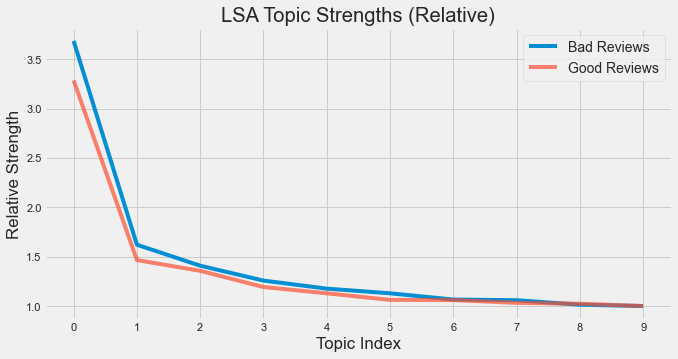

In [32]:
import gensim
from gensim import corpora, models, similarities, matutils
'This part credited to Ankur Vishwakarma, Oakland, CA. https://github.com/Vishwacorp/'
corpus1 = matutils.Sparse2Corpus(result1.transpose())
corpus2 = matutils.Sparse2Corpus(result2.transpose())
word_bad = dict((v,k) for k,v in tfidf_model1.vocabulary_.items())
word_good = dict((v,k) for k,v in tfidf_model2.vocabulary_.items())
word_bad2 = corpora.Dictionary.from_corpus(corpus1, id2word=word_bad)
word_good2 = corpora.Dictionary.from_corpus(corpus2, id2word=word_good)
lsa_bad = models.LsiModel(corpus1, id2word=word_bad2, num_topics=10)
lsa_good = models.LsiModel(corpus2, id2word=word_good2, num_topics=10)

singular_values_bad = lsa_bad.projection.s.tolist()
singular_values_bad_rel = [sv/singular_values_bad[-1] for sv in singular_values_bad]
singular_values_good = lsa_good.projection.s.tolist()
singular_values_good_rel = [sv/singular_values_good[-1] for sv in singular_values_good]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(range(len(singular_values_bad)), singular_values_bad_rel, label='Bad Reviews', alpha=1.0)
plt.plot(range(len(singular_values_good)), singular_values_good_rel, label='Good Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_bad)), range(len(singular_values_bad)))
plt.xlabel('Topic Index')
plt.ylabel('Relative Strength')
plt.title('LSA Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

**From the above plot, we can see the it is decent to choose topic number as 4.**

**Let's see roughly what are these topics:**

**Top topics in bad reviews:**

In [34]:
import pprint
from pprint import pprint
print('Top words for bad reviews')
print()
pprint(lsa_bad.show_topics()[0:4])

Top words for bad reviews

[(0,
  '0.210*"food" + 0.195*"steak" + 0.163*"time" + 0.159*"service" + '
  '0.147*"place" + 0.142*"table" + 0.131*"ordered" + 0.127*"restaurant" + '
  '0.118*"drink" + 0.117*"minute"'),
 (1,
  '0.474*"steak" + -0.253*"minute" + -0.204*"table" + 0.162*"medium" + '
  '-0.148*"drink" + 0.138*"salad" + 0.122*"cooked" + 0.121*"potato" + '
  '-0.121*"waited" + -0.120*"wait"'),
 (2,
  '0.448*"steak" + -0.220*"place" + -0.219*"food" + 0.217*"medium" + '
  '0.196*"minute" + 0.162*"rare" + -0.160*"burger" + -0.150*"cheese" + '
  '0.128*"manager" + 0.123*"ordered"'),
 (3,
  '0.357*"food" + 0.324*"service" + 0.293*"steak" + -0.233*"cheese" + '
  '-0.212*"burger" + -0.186*"salad" + -0.177*"ordered" + -0.176*"chicken" + '
  '0.173*"place" + 0.140*"price"')]


**It can be seen that the tops are likey to be:**

1.Service time of steak; 2.Waiting time between different courses; 3.Temperature of Steak and quality of other dishes; 4.Sides,salads and other snacks of the restaurant.

**Top topics in good reviews:**

In [35]:
print('Top words for bad reviews')
print()
pprint(lsa_good.show_topics()[0:4])

Top words for bad reviews

[(0,
  '0.210*"food" + 0.187*"steak" + 0.180*"place" + 0.174*"service" + '
  '0.147*"time" + 0.128*"restaurant" + 0.116*"bar" + 0.116*"delicious" + '
  '0.112*"dinner" + 0.111*"salad"'),
 (1,
  '0.365*"curd" + 0.360*"cheese" + 0.298*"burger" + -0.277*"steak" + '
  '0.261*"old" + 0.251*"beer" + 0.236*"fashioned" + 0.179*"wisconsin" + '
  '0.173*"madison" + 0.135*"place"'),
 (2,
  '-0.469*"food" + -0.311*"service" + -0.201*"atmosphere" + -0.179*"excellent" '
  '+ 0.175*"cheese" + 0.157*"salad" + 0.152*"ordered" + 0.148*"steak" + '
  '-0.146*"place" + -0.141*"amazing"'),
 (3,
  '0.579*"steak" + -0.235*"bar" + 0.185*"cheese" + 0.181*"service" + '
  '0.179*"curd" + -0.170*"brunch" + -0.167*"meat" + -0.158*"hour" + '
  '-0.151*"happy" + 0.142*"cooked"')]


**It can be discovered that the positive topics are likely to be:**

1.Service and food of the restaurant; 2.Drinks and other dishes; 3.Sides; 4.Bar and happy hour

**Given the results of LSA, we could find out that there exists some negative weights for the extracted topics, which makes it hard for interpretation and could be misleading.**

**Next, we tried NMF for better results.**

In [40]:
from sklearn.decomposition import NMF
num = 4
nmf_bad = NMF(n_components=num)
W_bad = nmf_bad.fit_transform(result1)
H_bad = nmf_bad.components_

nmf_good = NMF(n_components=num)
W_good = nmf_good.fit_transform(result2)
H_good = nmf_good.components_

In [41]:
print(H_good)

[[6.32454443e-04 2.44929896e-04 3.15605758e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.72746358e-05 3.78302826e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.73559005e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [39]:
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic %d: " % topic_idx
        message += " + ".join(['{:04.3f}*'.format(topic[i])+feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
n_top_words = 6

print('Top words in good reviews:')
print()
print_topics(nmf_good, tfidf_model2.get_feature_names(), n_top_words)

Top words in good reviews:

Topic 0: 0.763*salad + 0.744*meat + 0.675*ordered + 0.609*table + 0.595*bar + 0.579*dinner
Topic 1: 1.403*cheese + 1.255*curd + 1.137*burger + 0.971*old + 0.892*beer + 0.823*fashioned
Topic 2: 1.680*food + 1.190*service + 0.779*place + 0.707*excellent + 0.682*atmosphere + 0.661*amazing
Topic 3: 2.697*steak + 0.775*cooked + 0.457*perfectly + 0.428*side + 0.388*steakhouse + 0.378*house



In [145]:
print('Top words in bad reviews:')
print()
print_topics(nmf_bad, tfidf_model1.get_feature_names(), n_top_words)

Top words in bad reviews:

Topic 0: 1.065*minute + 1.033*table + 0.717*drink + 0.671*order + 0.543*time + 0.515*server + 0.507*wait + 0.505*waited + 0.494*asked + 0.490*took
Topic 1: 1.953*steak + 0.793*medium + 0.596*rare + 0.427*cooked + 0.399*ordered + 0.344*done + 0.279*filet + 0.249*cook + 0.223*cut + 0.212*steakhouse
Topic 2: 0.749*salad + 0.503*ordered + 0.479*chicken + 0.455*cheese + 0.390*burger + 0.372*fry + 0.353*meat + 0.352*potato + 0.351*sauce + 0.329*side
Topic 3: 1.598*food + 1.177*service + 0.994*place + 0.573*time + 0.422*slow + 0.405*price + 0.382*better + 0.373*restaurant + 0.337*quality + 0.324*get



**Compared with LSA method, we could give better interpretation based on the results of top words in topics.**

**It can be seen that the tops in good reviews are likey to be:**

(1) meat and salad; (2)sides and snacks;  (3) good service and atmosphere; (4) steak quality;

**It can be seen that the tops in bad reviews are likey to be:**

(1) slow service and drink; (2) temperature and quality of steak; (3) sides and ingredients; (4) place and price.

**By now we used LSA and NMF to choose top topics in review text, and from the results, we could make good interpretations. Then we'd like to try LDA.**

**Before using LDA, we need to use CountVectorizer to convert the collection of text documents to a vector of token counts.**

In [42]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cv_bad = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
cv_good = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

np.random.seed(20)
num_reviews = 5000
cv_random_bad = np.random.choice(badreviews, size=num_reviews)
cv_random_good = np.random.choice(goodreviews, size=num_reviews)
cv_bad_vectors = cv_bad.fit_transform(cv_random_bad).transpose()
cv_good_vectors = cv_good.fit_transform(cv_random_good).transpose()

In [43]:
corpus_bad = matutils.Sparse2Corpus(cv_bad_vectors)
corpus_good = matutils.Sparse2Corpus(cv_good_vectors)
id2word_cv_bad = dict((v, k) for k, v in cv_bad.vocabulary_.items())
id2word_cv_good = dict((v, k) for k, v in cv_good.vocabulary_.items())

In [44]:
lda_bad = models.ldamulticore.LdaMulticore(corpus=corpus_bad, num_topics=4, 
                                           id2word=id2word_cv_bad, passes=10, workers=15)
lda_good = models.ldamulticore.LdaMulticore(corpus=corpus_good, num_topics=4, 
                                           id2word=id2word_cv_good, passes=10, workers=15)

In [47]:
print('Top words for good reviews')
print()
pprint(lda_good.print_topics(num_words=10))

Top words for good reviews

[(0,
  '0.014*"food" + 0.011*"place" + 0.011*"bar" + 0.009*"also" + 0.008*"time" + '
  '0.007*"service" + 0.006*"restaurant" + 0.006*"meat" + 0.006*"table" + '
  '0.005*"delicious"'),
 (1,
  '0.027*"food" + 0.021*"service" + 0.013*"place" + 0.009*"dinner" + '
  '0.009*"excellent" + 0.008*"restaurant" + 0.008*"experience" + 0.008*"time" '
  '+ 0.007*"staff" + 0.007*"night"'),
 (2,
  '0.017*"cheese" + 0.014*"place" + 0.011*"old" + 0.011*"burger" + '
  '0.009*"food" + 0.008*"madison" + 0.008*"curds" + 0.007*"time" + '
  '0.007*"fashioned" + 0.006*"service"'),
 (3,
  '0.016*"steak" + 0.009*"ordered" + 0.008*"salad" + 0.007*"delicious" + '
  '0.007*"service" + 0.007*"cooked" + 0.006*"place" + 0.006*"meal" + '
  '0.006*"food" + 0.006*"also"')]


In [46]:
print('Top words for bad reviews')
print()
pprint(lda_bad.print_topics(num_words=10))

Top words for bad reviews

[(0,
  '0.014*"restaurant" + 0.013*"service" + 0.010*"place" + 0.008*"never" + '
  '0.008*"time" + 0.007*"manager" + 0.007*"table" + 0.006*"server" + '
  '0.005*"could" + 0.005*"night"'),
 (1,
  '0.013*"minutes" + 0.013*"table" + 0.011*"service" + 0.010*"time" + '
  '0.010*"asked" + 0.010*"order" + 0.008*"bar" + 0.007*"took" + 0.007*"wait" + '
  '0.007*"ordered"'),
 (2,
  '0.013*"place" + 0.007*"menu" + 0.007*"service" + 0.007*"cheese" + '
  '0.007*"chicken" + 0.006*"bar" + 0.006*"salad" + 0.006*"pretty" + '
  '0.005*"dinner" + 0.005*"ordered"'),
 (3,
  '0.025*"steak" + 0.014*"ordered" + 0.009*"salad" + 0.009*"service" + '
  '0.008*"medium" + 0.008*"cooked" + 0.007*"time" + 0.007*"meat" + '
  '0.006*"steaks" + 0.006*"meal"')]


**Compared with LSA method, we could give better interpretation based on the results of top words in topics.**

**It can be seen that the tops in good reviews are likey to be:**

(1) Food; (2) good service and atmosphere; (3) sides and snacks ; (4) steak quality.

**It can be seen that the tops in bad reviews are likey to be:**

(1) Atmosphere; (2) Service; (3) sides and other dishes; (4) steak quality.

**Seen from the results of LDA, the topics are mixed up. Therefore we are going to use TFIDF in future modeling.**

# Topic Modeling All Reviews <a name='s9'></a>  

In [48]:
print('Postive Reviews:  {:,}'.format(len(goodreviews)))
print('Negative Reviews:  {:,}'.format(len(badreviews)))

Postive Reviews:  17,270
Negative Reviews:  11,139


In [64]:
%%time
# Create a vectorizer object to generate term document counts
tfidf_model1 = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_model2 = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get the vectors
neg_vectors = tfidf_model1.fit_transform(badreviews)
pos_vectors = tfidf_model2.fit_transform(goodreviews)

Wall time: 1.64 s


In [65]:
%%time
# NMF for all reviews
from sklearn.decomposition import NMF

# change num_topics
num_topics = 4

nmf_pos = NMF(n_components=num_topics,max_iter=1000)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics,max_iter=1000)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

Wall time: 3.3 s


In [66]:
def display_topics(model, feature_names, num_topics, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < num_topics:
            print("{:11}".format("Topic %d:" %(topic_idx)), end='')
            print(", ".join(['{:04.3f}*'.format(topic[i])+feature_names[i] \
                             for i in topic.argsort()[:-no_top_words-1:-1]]))

In [67]:
no_topics = num_topics
no_top_words = 6

print('Topics for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_model2.get_feature_names(), no_topics, no_top_words)

print('\nTopics for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_model1.get_feature_names(), no_topics, no_top_words)

Topics for POSITIVE reviews
---------------------------------------
Topic 0:   1.116*bar, 1.094*place, 0.725*menu, 0.659*time, 0.570*happy, 0.525*meat
Topic 1:   1.620*cheese, 1.392*curds, 1.070*old, 0.924*fashioned, 0.704*beer, 0.695*madison
Topic 2:   1.743*food, 1.400*service, 0.851*excellent, 0.756*atmosphere, 0.755*amazing, 0.585*recommend
Topic 3:   1.592*steak, 0.843*ordered, 0.840*cooked, 0.682*salad, 0.603*delicious, 0.569*perfectly

Topics for NEGATIVE reviews
---------------------------------------
Topic 0:   1.120*minutes, 0.965*table, 0.710*time, 0.652*never, 0.647*order, 0.632*asked
Topic 1:   1.153*place, 0.842*service, 0.593*bar, 0.524*better, 0.492*restaurant, 0.394*much
Topic 2:   2.153*steak, 0.929*medium, 0.684*rare, 0.551*cooked, 0.533*steaks, 0.525*ordered
Topic 3:   0.834*cheese, 0.824*salad, 0.731*chicken, 0.605*ordered, 0.551*burger, 0.486*fries


In [70]:
# create topic dictionaries to summarize the topic meanings
pos_topics = {0:'Menu/Bar/Happy hour', 1:'Other main dishes and stype', 
              2:'Service and atmosphere', 3:'Quality of steaks'}

neg_topics = {0:'Service/Bar/Menu', 1:"Temperature of Steaks" , 2:'Service time', 
              3:'Quality of other sides and snacks'}

### Adding Topic Weights to Pandas DataFrame <a name='s10'></a>

In [71]:
# we create dataframes for positive & negative reviews that we can
# later add topic information to
df_pos = data[['business_id', 'stars_y', 'text', 'review_length']][data.stars_x>3].reset_index()
df_neg = data[['business_id', 'stars_y', 'text', 'review_length']][data.stars_x<=3].reset_index()
df_pos.drop(labels='index', axis=1, inplace=True)
df_neg.drop(labels='index', axis=1, inplace=True)

In [72]:
print('Topic weights : ', W_pos[0])
print('Sum of weights: ', W_pos[0].sum())

Topic weights :  [0.01724319 0.01652171 0.01657499 0.0043403 ]
Sum of weights:  0.05468018767924731


Results like these are not easy to interpretate, Therefore, we can normalize the weights so they all add up to 1. Such scale is much more straightforward.

In [73]:
from sklearn.preprocessing import normalize
print('Normalized Topic weights : ', normalize(W_pos[0].reshape(1,-1), norm='l1'))
print('Sum of normalized weights: ', normalize(W_pos[0].reshape(1,-1), norm='l1').sum())

Normalized Topic weights :  [[0.31534621 0.30215162 0.30312614 0.07937604]]
Sum of normalized weights:  0.9999999999999999


In [74]:
# add normalized topic weights to each review
df_pos = pd.concat([df_pos, pd.DataFrame(normalize(W_pos, norm='l1'))], axis=1)
df_neg = pd.concat([df_neg, pd.DataFrame(normalize(W_neg, norm='l1'))], axis=1)

In [75]:
# group by business_id and apply mean/count functions to columns
df_pos_bsns = df_pos.groupby('business_id').agg({'stars_y':'mean', 'text':'count',
                                                 'review_length':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean'}).reset_index()
df_neg_bsns = df_neg.groupby('business_id').agg({'stars_y':'mean', 'text':'count',
                                                 'review_length':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean'}).reset_index()

### Adding in Business Information <a name='s11'></a>

In [77]:
# we can read in business info from a saved CSV file
# and add that to our last dataframe
steak_df = pd.read_csv('review_steakhouse.csv')
steak_df.drop(labels='Unnamed: 0', axis=1, inplace=True)
steak_df=steak_df.drop(columns=['useful','text','address',"postal_code","attributes","categories"])

In [79]:
steakid=steak_df.groupby('business_id').apply(lambda x: x)
steakid=steakid.drop_duplicates()
steakid.head()

,user_id,business_id,stars_x,name,city,state,stars_y
0,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,Grandview Saloon,Pittsburgh,PA,3.0
1,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,Tempest Oyster Bar,Madison,WI,4.0
2,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,Ruths Chris Steak House,Pittsburgh,PA,4.0
3,Yvs8q8tth9J5-7Pdxkaq6w,eF2jf-E5ktRQIh_4_-Jxsg,4,Cannon's Chop House,Canonsburg,PA,3.5
4,kdBn3eSDHkHod1Sl7z_MXw,JhxI7oS_jsFnq34dDubugQ,2,Ferris Steak House,Cleveland,OH,3.5


In [80]:
df_pos_tot = df_pos_bsns.merge(steakid[['business_id','name','city','state']], left_on='business_id', 
                               right_on='business_id')[['business_id', 'name', 'city','state','stars_y', 0, 1, 2, 3]]

df_neg_tot = df_neg_bsns.merge(steakid[['business_id','name','city','state']], left_on='business_id', 
                               right_on='business_id')[['business_id', 'name', 'city','state','stars_y',0, 1, 2, 3]]

In [82]:
# peek into business/topic distributions
#df_pos_tot.head()
df_pos_tot=df_pos_tot.drop_duplicates()
df_neg_tot=df_neg_tot.drop_duplicates()

We can check topic distributions for a business and see how they make sense after all the reviews have been normalized and then averaged up to the business-level. Let's check `business_id '-bHpvkmiFzm_swHLYsGiqw'`, a famous grille resturant.

In [83]:
scores = df_pos_bsns[df_pos_bsns.business_id == '-bHpvkmiFzm_swHLYsGiqw'].iloc[:,-4:].values
print(steakid[steakid.business_id == '-bHpvkmiFzm_swHLYsGiqw']['name'].values[0] + ' - Positive Reviews')
print('-'*36)
for n in pos_topics:
    print('Topic {}: {:18} > {:.4f}'.format(n, pos_topics[n], scores[0][n]))

Ken Stewart's Grille - Positive Reviews
------------------------------------
Topic 0: Menu/Bar/Happy hour > 0.3323
Topic 1: Other main dishes and stype > 0.0544
Topic 2: Service and atmosphere > 0.3543
Topic 3: Quality of steaks  > 0.2589


We now have 4 dataframes:  
1. **`df_pos_tot`: ** topic distribution of positive reviews with name, city, and stars for all restaurants
2. **`df_neg_tot`: ** topic distribution of negative reviews with name, city, and stars for all restaurants
3. **`df_pos`: ** topic distribution of all positive reviews with associated business_id
4. **`df_neg`: ** topic distribution of all negative reviews with associated business_id  

We can write them to CSV files and then use that information for further analysis with R and Shiny app.

In [ ]:
%%time
# write to CSV
df_pos_tot.to_csv('outputcsv/pos_bsns.csv')
df_neg_tot.to_csv('outputcsv/neg_bsns.csv')